In [ ]:
import numpy as np

In [ ]:
from tensorflow import keras

In [ ]:
imdb = keras.datasets.imdb

In [ ]:
(Xtrain,ytrain),(Xtest,ytest) = imdb.load_data(num_words=10000) #reviews where length of review is greater or equal to the 10000|

In [ ]:
Xtrain

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [ ]:
def vec_seq(data,dimension=10000):
  result =np.zeros((len(data), dimension))
  for i,seq in enumerate(data):
    result[i,seq] = 1
  return result

In [ ]:
Xtrain = vec_seq(Xtrain)
Xtest = vec_seq(Xtest)

In [ ]:
Xtrain

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [ ]:
Xtrain.shape

(25000, 10000)

In [ ]:
Xtrain = np.expand_dims(Xtrain,axis = 1) #expand data to 3d dim from 2d

In [ ]:
Xtrain.shape

(25000, 1, 10000)

In [ ]:
Xtest = np.expand_dims(Xtest,axis = 1) #expand data to 3d dim from 2d

In [ ]:
model = keras.models.Sequential(
    [
        keras.layers.GRU(32,return_sequences=True, input_shape = (None,10000)),
        keras.layers.GRU(32),
        keras.layers.Dense(1,activation = "sigmoid"),
    ]

)

In [ ]:
model.compile(optimizer = "rmsprop", loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
history = model.fit(Xtrain,ytrain,epochs = 2, batch_size=512, validation_split=0.2)

Epoch 1/2
40/40 [==============================] - 9s 113ms/step - loss: 0.5126 - accuracy: 0.7901 - val_loss: 0.3602 - val_accuracy: 0.8648
Epoch 2/2
40/40 [==============================] - 4s 108ms/step - loss: 0.2873 - accuracy: 0.8896 - val_loss: 0.2794 - val_accuracy: 0.8902


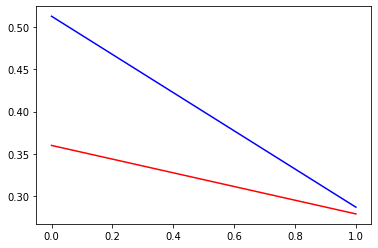

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],c = 'b')
plt.plot(history.history['val_loss'],c = 'r')




In [ ]:
results = model.evaluate(Xtest,ytest)

782/782 [==============================] - 4s 6ms/step - loss: 0.2903 - accuracy: 0.8832


In [ ]:
results[1]

0.8831999897956848